In [1]:
import crim_intervals as ci
import music21 as m21
import pandas as pd

In [23]:
us = m21.environment.UserSettings()
us.getSettingsPath()
us["musescoreDirectPNGPath"] = "/home/fmoss/.local/bin/mscore"

In [24]:
c = m21.chord.Chord(["C4", "E4", "G4"])

In [25]:
hexa = ci.analysis.neoRiemannian.completeHexatonic(c, simplifyEnharmonics=True)
hexa

[<music21.chord.Chord C4 E-4 G4>,
 <music21.chord.Chord C4 E-4 A-4>,
 <music21.chord.Chord B3 D#4 G#4>,
 <music21.chord.Chord B3 E4 G#4>,
 <music21.chord.Chord B3 E4 G4>,
 <music21.chord.Chord C4 E4 G4>]

In [26]:
for chord in hexa:
    chord.duration=m21.duration.Duration(1.)

In [27]:
s = m21.stream.Stream(hexa)

In [28]:
s.show("text")

{0.0} <music21.chord.Chord C4 E-4 G4>
{0.0} <music21.chord.Chord C4 E-4 A-4>
{0.0} <music21.chord.Chord B3 D#4 G#4>
{0.0} <music21.chord.Chord B3 E4 G#4>
{0.0} <music21.chord.Chord B3 E4 G4>
{0.0} <music21.chord.Chord C4 E4 G4>


/lib/x86_64-linux-gnu/libjack.so.0
/lib/x86_64-linux-gnu/libnss3.so
Creating main window…
Reading translations…
convert </tmp/music21/tmpv72mwucf.xml>...
	to </tmp/music21/tmpv72mwucf.png>
... success!


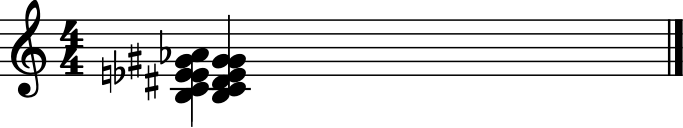

In [40]:
s.show()

<music21.corpus.corpora.CoreCorpus>

In [2]:
# construct corpus following instructions here: https://github.com/RichardFreedman/CRIM_JHUB/blob/main/Make-me-a-Corpus.ipynb
# and https://github.com/RichardFreedman/CRIM_JHUB/blob/main/CRIM_04b_Cadences_Corpus.ipynb

import requests
raw_prefix = "https://raw.githubusercontent.com/CRIM-Project/CRIM-online/master/crim/static/mei/MEI_4.0/"
URL = "https://api.github.com/repos/CRIM-Project/CRIM-online/git/trees/990f5eb3ff1e9623711514d6609da4076257816c"
piece_json = requests.get(URL).json()
piece_list = [raw_prefix + p["path"] for p in piece_json["tree"]]

In [3]:
piece_list[:5]

['https://raw.githubusercontent.com/CRIM-Project/CRIM-online/master/crim/static/mei/MEI_4.0/CRIM_Mass_0001.mei',
 'https://raw.githubusercontent.com/CRIM-Project/CRIM-online/master/crim/static/mei/MEI_4.0/CRIM_Mass_0001_1.mei',
 'https://raw.githubusercontent.com/CRIM-Project/CRIM-online/master/crim/static/mei/MEI_4.0/CRIM_Mass_0001_2.mei',
 'https://raw.githubusercontent.com/CRIM-Project/CRIM-online/master/crim/static/mei/MEI_4.0/CRIM_Mass_0001_3.mei',
 'https://raw.githubusercontent.com/CRIM-Project/CRIM-online/master/crim/static/mei/MEI_4.0/CRIM_Mass_0001_4.mei']

In [4]:
corpus = ci.CorpusBase(piece_list)

Requesting file from https://raw.githubusercontent.com/CRIM-Project/CRIM-online/master/crim/static/mei/MEI_4.0/CRIM_Mass_0001.mei...
Import from https://raw.githubusercontent.com/CRIM-Project/CRIM-online/master/crim/static/mei/MEI_4.0/CRIM_Mass_0001.mei failed, please check your url. File paths must begin with a '/'. Continuing to next file...
Requesting file from https://raw.githubusercontent.com/CRIM-Project/CRIM-online/master/crim/static/mei/MEI_4.0/CRIM_Mass_0001_1.mei...
Successfully imported.
Requesting file from https://raw.githubusercontent.com/CRIM-Project/CRIM-online/master/crim/static/mei/MEI_4.0/CRIM_Mass_0001_2.mei...
Successfully imported.
Requesting file from https://raw.githubusercontent.com/CRIM-Project/CRIM-online/master/crim/static/mei/MEI_4.0/CRIM_Mass_0001_3.mei...
Successfully imported.
Requesting file from https://raw.githubusercontent.com/CRIM-Project/CRIM-online/master/crim/static/mei/MEI_4.0/CRIM_Mass_0001_4.mei...
Successfully imported.
Requesting file from h

mei.base: WARNING: Importing <tie> without @startid and @endid is not yet supported.


Successfully imported.
Requesting file from https://raw.githubusercontent.com/CRIM-Project/CRIM-online/master/crim/static/mei/MEI_4.0/CRIM_Model_0043.mei...
Successfully imported.
Requesting file from https://raw.githubusercontent.com/CRIM-Project/CRIM-online/master/crim/static/mei/MEI_4.0/CRIM_Model_0045.mei...
Successfully imported.
Requesting file from https://raw.githubusercontent.com/CRIM-Project/CRIM-online/master/crim/static/mei/MEI_4.0/CRIM_Model_0046.mei...
Successfully imported.
Requesting file from https://raw.githubusercontent.com/CRIM-Project/CRIM-online/master/crim/static/mei/MEI_4.0/CRIM_Model_0047.mei...
Successfully imported.
Requesting file from https://raw.githubusercontent.com/CRIM-Project/CRIM-online/master/crim/static/mei/MEI_4.0/CRIM_Model_0048.mei...
Successfully imported.
Requesting file from https://raw.githubusercontent.com/CRIM-Project/CRIM-online/master/crim/static/mei/MEI_4.0/CRIM_Model_0049.mei...
Successfully imported.
Requesting file from https://raw.gi

In [5]:
def count_all(df, normalize=False):
    s = pd.concat([df[col] for col in df.columns])
    return s.value_counts(normalize=normalize)

In [6]:
count_all(corpus.scores[2].getNoteRest(), normalize=False)

D4      181
Rest    158
F4      152
G4      112
G3      101
A4       99
B-3      89
C4       88
B-4      86
A3       85
E4       68
F3       64
D5       60
D3       55
C5       53
E3       18
B-2      14
C3       13
E5        8
F5        8
E-4       8
G5        2
E-5       2
E-3       2
dtype: int64

In [229]:
counts = pd.DataFrame([ count_all( corpus.scores[i].getNoteRest()) for i in range(len(corpus.scores)) ]).reset_index(drop=True)
counts = counts.fillna(1)# fill NaN values
del counts["Rest"]
counts = counts.iloc[:,:20]
counts

,D4,G4,G3,F4,A4,B-3,D5,A3,C4,B-4,E4,D3,C5,F3,E3,E5,F5,G5,C3,B-2
0,39.0,32.0,30.0,28.0,27.0,20.0,18.0,18.0,18.0,16.0,15.0,12.0,10.0,7.0,7.0,6.0,4.0,2.0,2.0,1.0
1,119.0,80.0,84.0,89.0,69.0,58.0,49.0,46.0,40.0,55.0,47.0,32.0,35.0,32.0,16.0,5.0,4.0,1.0,5.0,3.0
2,181.0,112.0,101.0,152.0,99.0,89.0,60.0,85.0,88.0,86.0,68.0,55.0,53.0,64.0,18.0,8.0,8.0,2.0,13.0,14.0
3,105.0,93.0,62.0,90.0,78.0,57.0,64.0,51.0,52.0,59.0,69.0,24.0,50.0,26.0,14.0,16.0,8.0,1.0,2.0,1.0
4,51.0,29.0,29.0,34.0,17.0,30.0,22.0,22.0,26.0,20.0,19.0,14.0,19.0,12.0,7.0,3.0,2.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,312.0,299.0,242.0,148.0,184.0,7.0,153.0,173.0,262.0,7.0,235.0,62.0,157.0,80.0,75.0,73.0,28.0,14.0,51.0,1.0
260,147.0,98.0,70.0,101.0,106.0,66.0,70.0,74.0,81.0,41.0,70.0,43.0,37.0,25.0,9.0,36.0,29.0,1.0,5.0,1.0
261,87.0,120.0,44.0,57.0,73.0,3.0,45.0,36.0,85.0,5.0,75.0,8.0,49.0,16.0,7.0,22.0,5.0,3.0,7.0,1.0
262,38.0,31.0,27.0,59.0,19.0,23.0,1.0,29.0,53.0,20.0,27.0,13.0,1.0,56.0,14.0,1.0,1.0,1.0,21.0,15.0


In [242]:
import numpy as np

dia = ["B-"] + list("FCGDAEB") + ["Rest"]

cmap = plt.get_cmap('tab20')
colors = cmap(np.linspace(0, 1, len(dia)))

c = [colors[dia.index(l)] for l in counts.idxmax(axis=1).apply(lambda x: x[:-1] if x[-1] != "t" else x).values]

In [243]:
counts = counts.div(counts.sum(axis=1), axis=0)

In [244]:
X = counts.values

In [245]:
from sklearn.decomposition import PCA

In [246]:
pca = PCA()

In [247]:
X_ = pca.fit_transform(X)

In [248]:
import matplotlib.pyplot as plt

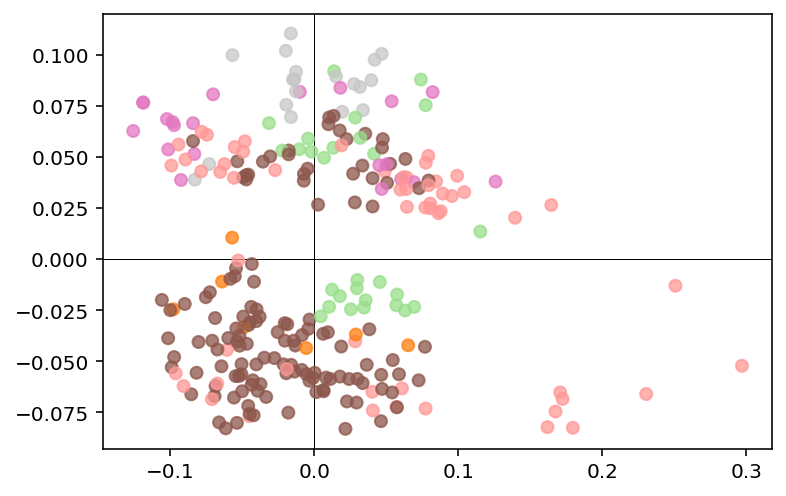

In [249]:
plt.scatter(X_[:,0], X_[:,1], alpha=.75, zorder=3, c=c)
plt.axhline(0, lw=.5, c="k")
plt.axvline(0, lw=.5, c="k")
plt.show()

In [250]:
from sklearn.manifold import TSNE

In [266]:
tsne = TSNE(n_components=2, metric="cosine", perplexity=25)

In [267]:
X__ = tsne.fit_transform(X)

/home/fmoss/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/fmoss/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/fmoss/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:819: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


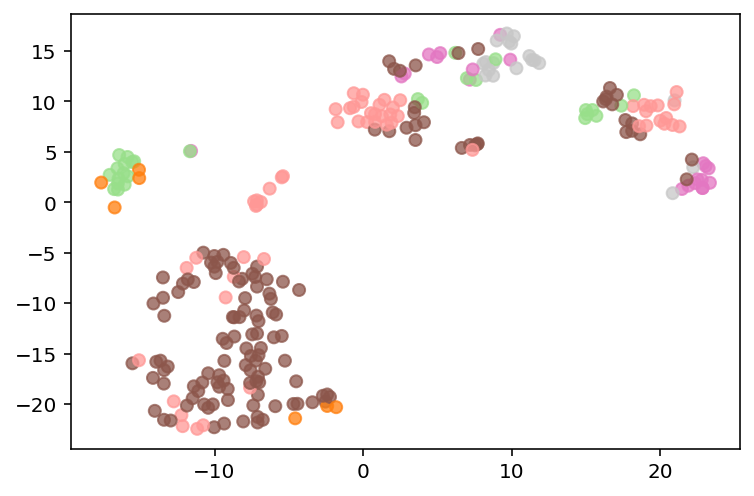

In [269]:
plt.scatter(X__[:,0], X__[:,1], alpha=.75, zorder=3, c=c)
plt.show()

In [300]:
corpus.scores[3].analyses["note_list"][4].note

<music21.note.Note D>